<a href="https://colab.research.google.com/github/dimaakapout/MyProjects/blob/master/nlp/nlp_001_TF-IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация писем fetch_20newsgroups

Простой способ - bag of words, TF-IDF

In [0]:
# Import 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
# Скачиваем обучающую и валидационную выборки

data_train = fetch_20newsgroups(subset='train') 
data_val = fetch_20newsgroups(subset='test')    

In [22]:
# Пример e-mail 
print(data_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [24]:
# Категории

data_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
len(data_train.data), len(data_val.data) # Размер обучающей и валидационной выборки

(11314, 7532)

## Подготовка данных

делим на train, test, val

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_train.data, data_train.target)
X_val, y_val = data_val.data, data_val.target

In [76]:
len(X_train), len(X_test), len(X_val)

(8485, 2829, 7532)

# 1. CountVectorizer

Подготовим вектора для классификации

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
countVectorizer = CountVectorizer(lowercase=True, # Привести в нижнему регистру все символы
                    stop_words = 'english',
                    tokenizer=None,               # Используемый токенизатор
                    token_pattern='(?u)\\b\\w\\w+\\b',
                    analyzer='word',              # ‘word’, ‘char’, ‘char_wb’- n-граммы только внутри слова  
                    max_df=1.0,                   # max частота
                    min_df=1)                     # min частота слова

In [79]:
countVectorizer.build_analyzer()

functools.partial(<function _analyze at 0x7f7a3ff79b70>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>, tokenizer=<built-in method findall of _sre.SRE_Pattern object at 0x7f7a3f445e40>, preprocessor=functools.partial(<function _preprocess at 0x7f7a409347b8>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
     

In [80]:
countVectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train_vec = countVectorizer.transform(X_train)
X_test_vec = countVectorizer.transform(X_test)
X_val_vec = countVectorizer.transform(X_val)

## Классификация

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logReg = LogisticRegression()

In [84]:
logReg.fit(X_train_vec, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Оценим результаты (тест)

In [87]:
y_pred = logReg.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       115
           1       0.70      0.80      0.75       131
           2       0.90      0.84      0.87       153
           3       0.75      0.83      0.79       138
           4       0.90      0.84      0.87       145
           5       0.86      0.84      0.85       134
           6       0.83      0.83      0.83       146
           7       0.86      0.90      0.88       134
           8       0.95      0.90      0.93       166
           9       0.86      0.95      0.90       148
          10       0.96      0.94      0.95       159
          11       0.97      0.93      0.95       157
          12       0.86      0.88      0.87       156
          13       0.93      0.93      0.93       160
          14       0.96      0.93      0.95       148
          15       0.87      0.93      0.89       147
          16       0.98      0.92      0.95       128
          17       0.97    

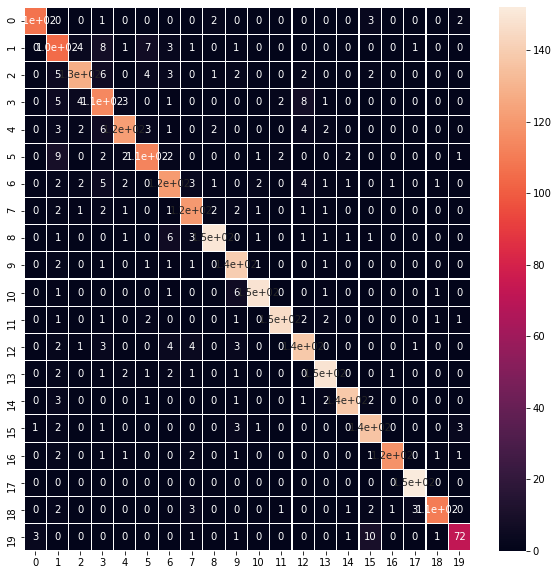

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.1, ax=ax)

### Результаты на валидации

In [103]:
# На валидации
y_pred = logReg.predict(X_val_vec)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       319
           1       0.66      0.77      0.71       389
           2       0.73      0.64      0.69       394
           3       0.62      0.71      0.66       392
           4       0.77      0.79      0.78       385
           5       0.79      0.72      0.75       395
           6       0.79      0.86      0.82       390
           7       0.85      0.85      0.85       396
           8       0.91      0.92      0.91       398
           9       0.81      0.87      0.84       397
          10       0.91      0.92      0.92       399
          11       0.92      0.87      0.89       396
          12       0.69      0.70      0.70       393
          13       0.87      0.76      0.81       396
          14       0.93      0.89      0.91       394
          15       0.81      0.92      0.86       398
          16       0.70      0.85      0.77       364
          17       0.96    

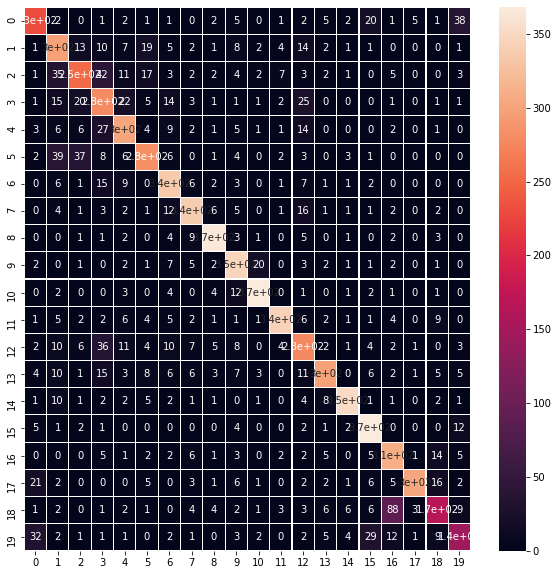

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, linewidths=0.1, ax=ax)

# 2. TfidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidfVectorizer = TfidfVectorizer(lowercase=True, 
                                  preprocessor=None, 
                                  tokenizer=None, 
                                  analyzer='word', 
                                  stop_words='english', 
                                  token_pattern='(?u)\\b\\w\\w+\\b', 
                                  ngram_range=(1, 1), 
                                  max_df=1.0, 
                                  min_df=1, 
                                  norm='l2', 
                                  use_idf=True, 
                                  smooth_idf=True, 
                                  sublinear_tf=False) # replace tf with 1 + log(tf).

In [114]:
tfidfVectorizer.build_analyzer()

functools.partial(<function _analyze at 0x7f7a3ff79b70>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>, tokenizer=<built-in method findall of _sre.SRE_Pattern object at 0x7f7a3f445e40>, preprocessor=functools.partial(<function _preprocess at 0x7f7a409347b8>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
             

In [115]:
tfidfVectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
X_train_vec_TfIdf = tfidfVectorizer.transform(X_train)
X_test_vec_TfIdf  = tfidfVectorizer.transform(X_test)
X_val_vec_TfIdf  = tfidfVectorizer.transform(X_val)

## Классификация

In [0]:
logRegTfIdf = LogisticRegression()

In [118]:
logRegTfIdf.fit(X_train_vec_TfIdf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Оценим результаты (тест)

In [119]:
y_pred = logRegTfIdf.predict(X_test_vec_TfIdf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       115
           1       0.72      0.83      0.77       131
           2       0.91      0.89      0.90       153
           3       0.73      0.86      0.79       138
           4       0.90      0.83      0.86       145
           5       0.89      0.84      0.86       134
           6       0.79      0.83      0.81       146
           7       0.90      0.90      0.90       134
           8       0.96      0.92      0.94       166
           9       0.91      0.95      0.93       148
          10       0.97      0.99      0.98       159
          11       0.99      0.92      0.95       157
          12       0.87      0.88      0.87       156
          13       0.97      0.93      0.95       160
          14       0.92      0.96      0.94       148
          15       0.88      0.95      0.91       147
          16       0.99      0.94      0.96       128
          17       0.97    

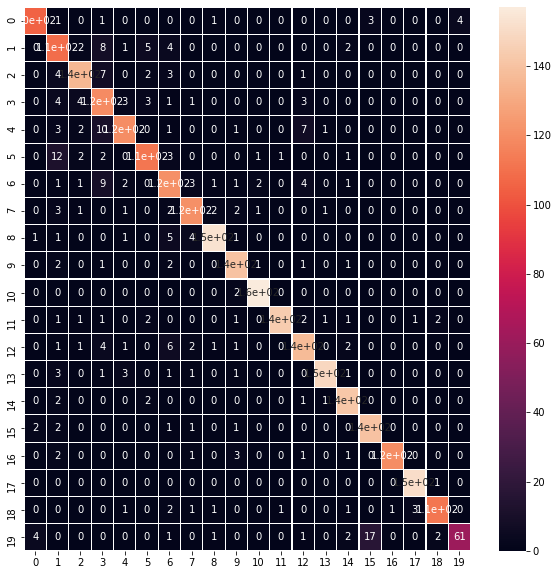

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.1, ax=ax)

### результаты на валидации

In [122]:
y_pred = logRegTfIdf.predict(X_val_vec_TfIdf)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       319
           1       0.67      0.80      0.73       389
           2       0.73      0.74      0.73       394
           3       0.69      0.73      0.71       392
           4       0.82      0.80      0.81       385
           5       0.84      0.75      0.79       395
           6       0.79      0.85      0.82       390
           7       0.88      0.89      0.89       396
           8       0.95      0.94      0.94       398
           9       0.88      0.92      0.90       397
          10       0.92      0.95      0.94       399
          11       0.95      0.89      0.92       396
          12       0.73      0.76      0.74       393
          13       0.87      0.84      0.85       396
          14       0.88      0.90      0.89       394
          15       0.79      0.93      0.86       398
          16       0.73      0.90      0.81       364
          17       0.96    

# Выводы

В целом вектора TF-IDF показали себя немного лучше, чем счетчики (примерно на 4% по macro_avg метрикам).

Что можно сделать лучше:
1. Провести лемматизацию
2. Сделать более умную разбивку на токены, почистить редкий неинформативный мусор